# Oblig C: Dynamiske systemer
## C.1
a)

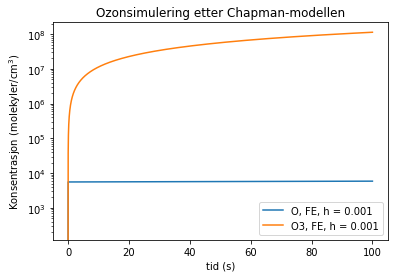

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanter og initalbetingelser
k1 = 3.0e-12
k2 = 1.2e-33
k3 = 5.5e-4
k4 = 6.9e-16
M = 9e17

O_0 = 0
O2_0 = 0.21*M
O3_0 = 0

# Tidsparametre
t0 = 0
tid_slutt = 100 # Tid i sekunder

# Difflikninger
def dO(o, o2, o3):
    return 2*k1*o2 - k2*o2*o*M + k3*o3 - k4*o*o3

def dO2(o,o2, o3):
    return (-k1*o2) - (k2*o2*o*M) + (k3*o3) + (2*k4*o*o3)

def dO3(o, o2, o3):
    return k2*o2*o*M - k3*o3 - k4*o*o3

#Forward Euler
def FE(O_0,O2_0,O3_0,h):
    N = int((tid_slutt - t0)/h)
    t = np.zeros(N)
    t[0] = t0
    O = np.zeros(N)
    O2 = np.zeros(N)
    O3 = np.zeros(N)
    # Initialbetingelser
    O[0] = O_0
    O2[0] = O2_0
    O3[0] = O3_0
    for i in range(N-1):
        O[i+1] = O[i] + dO(O[i],O2[i],O3[i])*h
        O2[i+1] = O2[i] + dO2(O[i],O2[i],O3[i])*h
        O3[i+1] = O3[i] + dO3(O[i],O2[i],O3[i])*h
        t[i+1] = t[i] + h
    return O, O2, O3, t

# Plotting
plt.title('Ozonsimulering etter Chapman-modellen')
h = 0.001
O, O2, O3, t = FE(O_0,O2_0,O3_0,0.001)
plt.yscale("log")
plt.plot(t, O, label = f'O, FE, h = {h:.3f}')
plt.plot(t, O3, label = f'O3, FE, h = {h:.3f}')
plt.xlabel('tid (s)')
plt.ylabel('Konsentrasjon (molekyler/cm$^3$)')
plt.legend()
plt.show()

b)

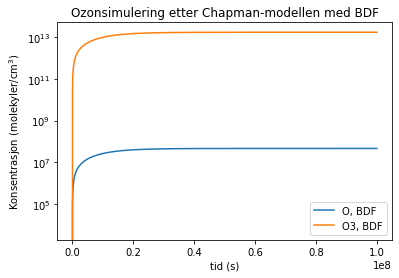

In [3]:
# Integrering med Scipy-biblioteket
from scipy.integrate import solve_ivp

def ratelover(t,y):
    o = y[0]
    o2 = y[1]
    o3 = y[2]
    dOdt = 2*k1*o2 - k2*o2*o*M + k3*o3 - k4*o*o3
    dO2dt = (-k1*o2) - (k2*o2*o*M) + (k3*o3) + (2*k4*o*o3)
    dO3dt = k2*o2*o*M - k3*o3 - k4*o*o3
    return [dOdt, dO2dt, dO3dt]

tid_slutt = 1E8
t = np.linspace(t0,tid_slutt,int(1E6))
y0 = [O_0,O2_0,O3_0] # Array med startverdier

C = solve_ivp(ratelover, [t0,tid_slutt], y0, t_eval = t, method = 'BDF')
plt.title('Ozonsimulering etter Chapman-modellen med BDF')
plt.yscale("log")
plt.plot(C.t, C.y[0],label = f'O, BDF') # Plotter [O]
plt.plot(C.t, C.y[2],label = f'O3, BDF') # Plotter [O3]
plt.xlabel('tid (s)')
plt.ylabel('Konsentrasjon (molekyler/cm$^3$)')
plt.legend(loc=0)
plt.show()

In [6]:
# Sammenlikning av simulering med BE og steady-state
O3_steadystate = np.sqrt(k1*k2/(k3*k4))*O2_0*np.sqrt(M)
O_steadystate = k3*O3_steadystate/(k2*O2_0*M)
avvik_O = abs(C.y[0][-1] - O_steadystate)/(O_steadystate)*100
avvik_O3 = abs(C.y[2][-1] - O3_steadystate)/(O3_steadystate)*100

print(f'Avvik mellom beregnet verdi og steady state er {avvik_O:.4f} % for oksygen og {avvik_O3:.4f} % for ozon.')

Avvik mellom beregnet verdi og steady state er 0.0141 % for oksygen og 0.0056 % for ozon.


Vi ser at avviket er svært lite, og at steady-state-tilnærmingen passer svært godt i dette tilfellet.